### Generatee DATA and test LOM

In [22]:
## Linear increasing kernel
import GPy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
kenrel1 = GPy.kern.Linear(1,variances=3) + GPy.kern.ExpQuad(1,lengthscale=1,variance=2)
kenrel2 = GPy.kern.Linear(1,variances=3) + GPy.kern.Brownian(1,variance=2) 
Cosine1 = GPy.kern.Cosine(1,lengthscale=4,variance=2)
gaussian = GPy.kern.ExpQuad(1,lengthscale=1,variance=2)

In [ ]:
P = 3
The idea is to have three latents for every instance:
    1. gaussian: Inherently random for each isntance
    2. Linear or Cyclic: this decides the labels
    3. Gaussian : Random
    

In [18]:
def scaleIt(d):
    return (d - d.min())/(d.max() - d.min())

def generatelatentS(N,kernel,noiselevel =0.5,scale=True):
    x = np.linspace(0,N-1,N)
    u1 = np.random.multivariate_normal(mean=np.zeros(N).flatten(),cov=kernel.K(x.reshape(N,1))) 
    if scale:
        return scaleIt(u1)
    else:
        return u1

def generatelatent(N,noiselevel=0.5):
    x = np.linspace(0,N-1,N)
    u1 = np.random.multivariate_normal(mean=np.zeros(N).flatten(),cov=kenrel2.K(x.reshape(N,1))) + noiselevel* np.random.normal(0,1,N)
    u2 = np.random.multivariate_normal(mean=np.zeros(N).flatten(),cov=gaussian.K(x.reshape(N,1))) + noiselevel* np.random.normal(0,1,N)
    g1 = np.random.multivariate_normal(mean=np.ones(N).flatten(),cov=gaussian.K(x.reshape(N,1))) + noiselevel* np.random.normal(0,1,N)
    g2 = np.random.multivariate_normal(mean=np.ones(N).flatten(),cov=Cosine1.K(x.reshape(N,1))) + noiselevel*np.random.normal(0,1,N)
    return scale(u1),scale(u2),scale(g1),scale(g2)

def generateData(W,phi,P=1,S=100,C=3,N=100,scale=True):
    #phi = np.random.normal(loc=0,scale=1,size=(C,P))
    phiBar = np.matrix(np.kron(phi,np.eye(N)))
    B = np.ones(S)
    #W = np.random.rand(P*N)
    uBar = np.matrix(np.ones((S,N*P)))
    l = np.zeros(S)
    L = np.zeros(S)
    for s in range(S):
        if np.random.rand() < 0.4:
            L[s] = 1
            #us = np.hstack([a for i,a in enumerate(latents) if i!= 1 ])
            us = generatelatentS(N,scale=scale,kernel=kenrel1)
            if (us[0]-us[-1]) < 0:
                us = scaleIt(us*(-1))
        else:
            L[s] = -1
            #us = np.hstack([a for i,a in enumerate(latents) if i!= 0 ])
            us = generatelatentS(N,scale=scale,kernel=gaussian)
        uBar[s,:] = us
        l[s] = np.dot(uBar[s,:] ,W) + B[s]
        #L[s] = guessLabel(l[s])
    #print S,C,P,N
    #print "\n--",uBar.shape,phiBar.shape
    YBar = uBar * phiBar.T + np.random.random()
    #print YBar.shape
    return YBar,L,uBar,l

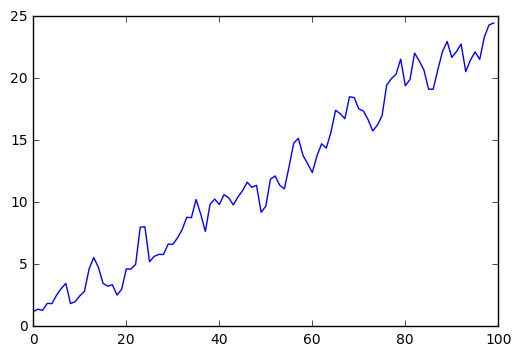

In [14]:
us = generatelatentS(N,kernel=kenrel1,scale=False)
plt.plot(us)

In [3]:
def generateData2(W,phi,P=1,S=100,C=3,N=100):
    #phi = np.random.normal(loc=0,scale=1,size=(C,P))
    phiBar = np.matrix(np.kron(phi,np.eye(N)))
    B = np.ones(S)
    #W = np.random.rand(P*N)
    uBar = np.matrix(np.ones((S,N*P)))
    l = np.zeros(S)
    L = np.zeros(S)
    for s in range(S):
        us = generatelatentS(N,kernel=kenrel1)
        if (us[0]-us[-1]) < 0:
            L[s] = 1
        else:
            L[s] = -1
            #us = np.hstack([a for i,a in enumerate(latents) if i!= 0 ])
            #us = generatelatentS(N,kernel=Cosine1)
        uBar[s,:] = us
        l[s] = np.dot(uBar[s,:] ,W) + B[s]
        #L[s] = guessLabel(l[s])
    #print S,C,P,N
    #print "\n--",uBar.shape,phiBar.shape
    YBar = uBar * phiBar.T + np.random.random()
    #print YBar.shape
    return YBar,L,uBar,l

In [21]:
N = 60
S=100
C=3
P=2
phi = np.random.normal(loc=0,scale=1,size=(C,P))
W = np.random.rand(P*N)
#ltnt = generatelatent(N)
Y,L,uBar,ls = generateData(W,phi,S=S,C=C,N=N)

ValueError: shapes (1,60) and (120,) not aligned: 60 (dim 1) != 120 (dim 0)

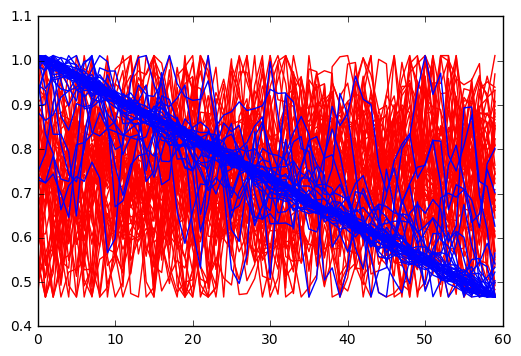

In [20]:
def plotLabel(YBar,L,S):
    for s in range(S):
        if L[s] < 0:
            plt.plot(YBar[s].T,c='r')
    for s in range(S):
        if L[s] > 0:
            plt.plot(YBar[s].T,c='b')
plotLabel(Y,L,S)

In [75]:
C

1

In [7]:
import pickle
f = open("Y_train.pickle","wb")
pickle.dump(Y_train,f)
f.close()
f = open("L_train.pickle","wb")
pickle.dump(L_train,f)
f.close()
f = open("Y_test.pickle","wb")
pickle.dump(Y_test,f)
f.close()
f = open("L_test.pickle","wb")
pickle.dump(L_test,f)
f.close()

In [6]:
import LOM
from sklearn.cross_validation import train_test_split
from sklearn import metrics
Y_train, Y_test, L_train, L_test = train_test_split(Y, L, test_size=0.4, random_state=0)
# fit the model
ind=1
#myModel = LOM.LOM(Y=Y_train,L=L_train,N=N,C=1,S=L_train.shape[0])
#myModel.fit(n=int(N*ind),iters=200,P=3)
# predict for test
#predictions,Expresults, _ = myModel.predict(Y_train)


 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


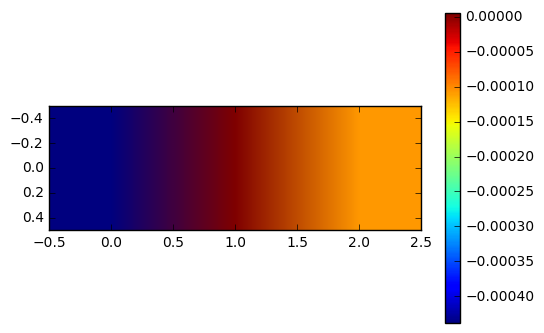

In [15]:
plt.imshow(myModel.phiHatExp)
plt.colorbar()

In [7]:
def guessLabel(l,mu=0):
    if l < mu:
        return -1
    else:
        return 1

YBar = Y_train
S = Y_train.shape[0]
C= 1


Concatenated Latent Gaussian Processes:
(400, 400) (180, 400, 1)


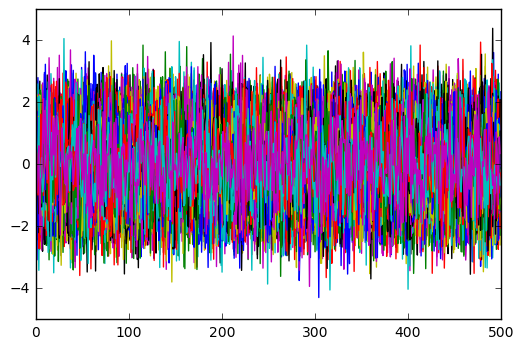

In [52]:
## get random inducing point
## Intialization for variational inference
import scipy as sc
P=5
x = np.linspace(0,N-1,N)
noOfInductions = int(N*0.8)
n = np.sort(np.random.choice(x,size=noOfInductions,replace=False))
nBar = np.concatenate([c*N+n for c in range(C)])
NBar = np.concatenate([c*N+x for c in range(C)])
# Create Matrices
Knn = list()
KNn = list()
KnnInv = list()
KNN = list()
ls = [2,2,2,2,2]
for i in range(P):
    kenrel = GPy.kern.ExpQuad(1,lengthscale=ls[i]) + GPy.kern.Linear(1,variances=3)
    Knn.append(kenrel.K(n.reshape(noOfInductions,1))+np.eye(noOfInductions)*0.0)
    KNn.append(kenrel.K(x.reshape(N,1), n.reshape(noOfInductions,1)))
    KNN.append(kenrel.K(x.reshape(N,1))+np.eye(N)*0.00)
    KnnInv.append(np.linalg.inv(Knn[i]))
Kpnn = np.matrix(sc.linalg.block_diag(*Knn))
KpNn = np.matrix(sc.linalg.block_diag(*KNn))
KpnnInv = np.matrix(sc.linalg.block_diag(*KnnInv))
KpNN = np.matrix(sc.linalg.block_diag(*KNN))
# Generate a guess for phi
phiHatMean = 0
phiHatV = 1
phiHatExp = np.mat(np.random.normal(loc=phiHatMean,scale=phiHatV,size=(C,P)))
phiHatExpBar = np.kron(phiHatExp,np.eye(N))
phiHatVar = np.eye(P)
# Generate a guess for B
BHatMean = 0
BHatV = 1
BHatExp = np.mat(np.random.normal(loc=BHatMean,scale=BHatV,size=(S,1)))
# Generate a guess for W
WHatMean = 0
WHatV = 1
WHatExp = np.mat(np.random.normal(loc=WHatMean,scale=WHatV,size=(1,P*N)))
WHatV = np.eye(P*N)
#Generate samples for latent
uHatMeansBar = np.random.normal(loc=0,scale=1,size=(S,noOfInductions*P,1))
uHatVsBar = np.eye(noOfInductions*P)
uExpBar = np.random.normal(loc=0,scale=1,size=(S,N*P))
print "Concatenated Latent Gaussian Processes:"
i=plt.plot(uExpBar.T)
print uHatVsBar.shape,uHatMeansBar.shape
## Generate Sample for latent labels
lHatExp = (uExpBar * WHatExp.T) + BHatExp
## Get initial label guess
LHat = np.ones(S)
LHat = [guessLabel(lHatExp[s]) for s in range(S)]

In [60]:
#Calculate F and Z
def calculateVZ(uVBar):
    Vphi = np.zeros((P,P))
    Zbar = np.zeros((P,C))
    #SUm over S's
    sigma = np.zeros((P,P))
    for p in range(P):
        sigmaPP = uVBar[p*N:p*N+N,p*N:p*N+N]
        #print p, sigma
        sigma[p,p] = np.trace(sigmaPP)
    for s in range(S):
        usBar = uExpBar[s].reshape(P,N)
        ysBar = YBar[s].reshape(C,N)
        Vphi += usBar*usBar.T + sigma
        Zbar += usBar*ysBar.T
    return sigma,Vphi,Zbar

from scipy.stats import norm as norm
def calculateTNMean(Mu):
    means = np.zeros(S)
    for s in range(S):
        if L[s] == 1:
            a = 0
            b = np.infty
        else:
            a = -np.infty
            b = 0
        if Mu[0,s] < -5:
            Mu[0,s] = -5
        if Mu[0,s] > 5:
            Mu[0,s] = 5
        alpha = a - Mu[0,s]
        beta = b - Mu[0,s]
        Z = norm.cdf(beta) - norm.cdf(alpha)
        #print beta, alpha,Z
        means[s] = Mu[0,s] + (norm.pdf(alpha) - norm.pdf(beta))/Z
    return means


for i in range(300):
    ## Update for uHat
    phiHatExpBar = np.kron(phiHatExp,np.eye(N))
    phiHatVarBar = np.kron(phiHatVar,np.eye(N))
    Fu = phiHatExpBar.T*phiHatExpBar + phiHatVarBar + WHatExp.T*WHatExp + WHatV
    uHatVsBar = np.linalg.inv(KpnnInv + KpnnInv*KpNn.T*Fu*KpNn*KpnnInv)
    uHatMeansBar = (YBar*phiHatExpBar + lHatExp * WHatExp - BHatExp * WHatExp )* KpNn*KpnnInv*uHatVsBar
    #Update for u 
    M = np.matrix(KpnnInv * KpNn.T)
    uExpBar = uHatMeansBar * M
    uVBar = KpNN - KpNn*KpnnInv*KpNn.T + M.T*uHatVsBar*M
    #Update for phi
    sigm,VPhi,Zbar = calculateVZ(uVBar)
    phiHatVar = np.linalg.inv(VPhi + np.eye(P))
    phiHatExp = np.matrix(Zbar.T) * phiHatVar
    #Update for W
    WHatV = np.linalg.inv(uExpBar.T*uExpBar + uVBar + np.eye(uVBar.shape[0]))
    WHatExp =  (lHatExp.T*uExpBar - BHatExp.T*uExpBar )*WHatV
    #Update for B
    BHatExp = (np.ones(S)*np.sum(lHatExp - uExpBar * WHatExp.T)/(S+1)).reshape(S,1)
    #Update for l
    lHatExp = calculateTNMean(WHatExp*uExpBar.T + BHatExp).reshape(S,1)



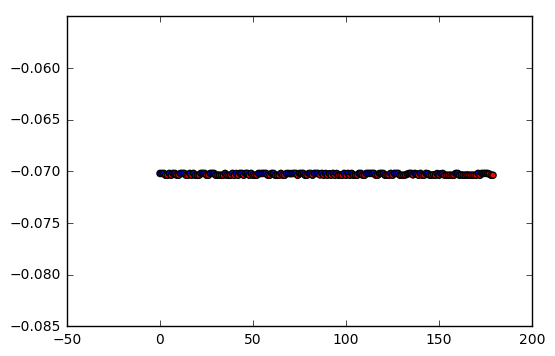

In [71]:
def getColor(l):
    if t < 0:
        return 'r'
    else:
        return 'b'
    
plt.scatter(range(Expresults.shape[0]),Expresults,c=[getColor(t) for t in L_train])

In [48]:
indices = np.where(lHatExp > 0)[0]

In [45]:
indices.shape

(110,)

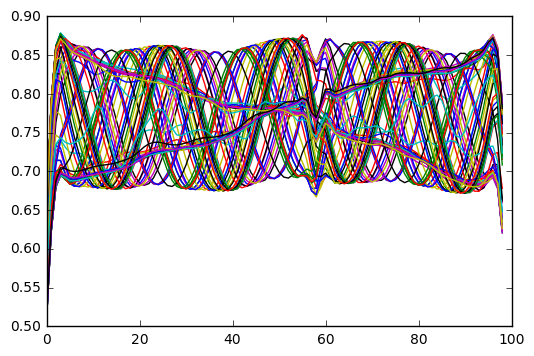

In [51]:
i=plt.plot(uExpBar[indices,400:499].T)

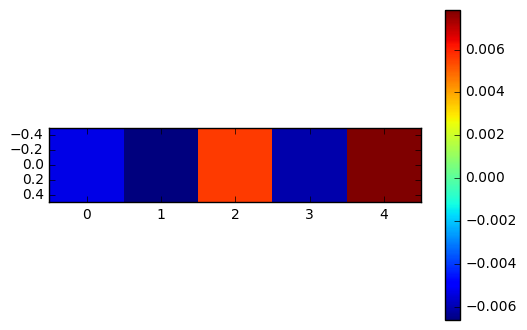

In [61]:
plt.imshow(phiHatExp,interpolation='none')
plt.colorbar()

IndexError: index 1 is out of bounds for axis 0 with size 1

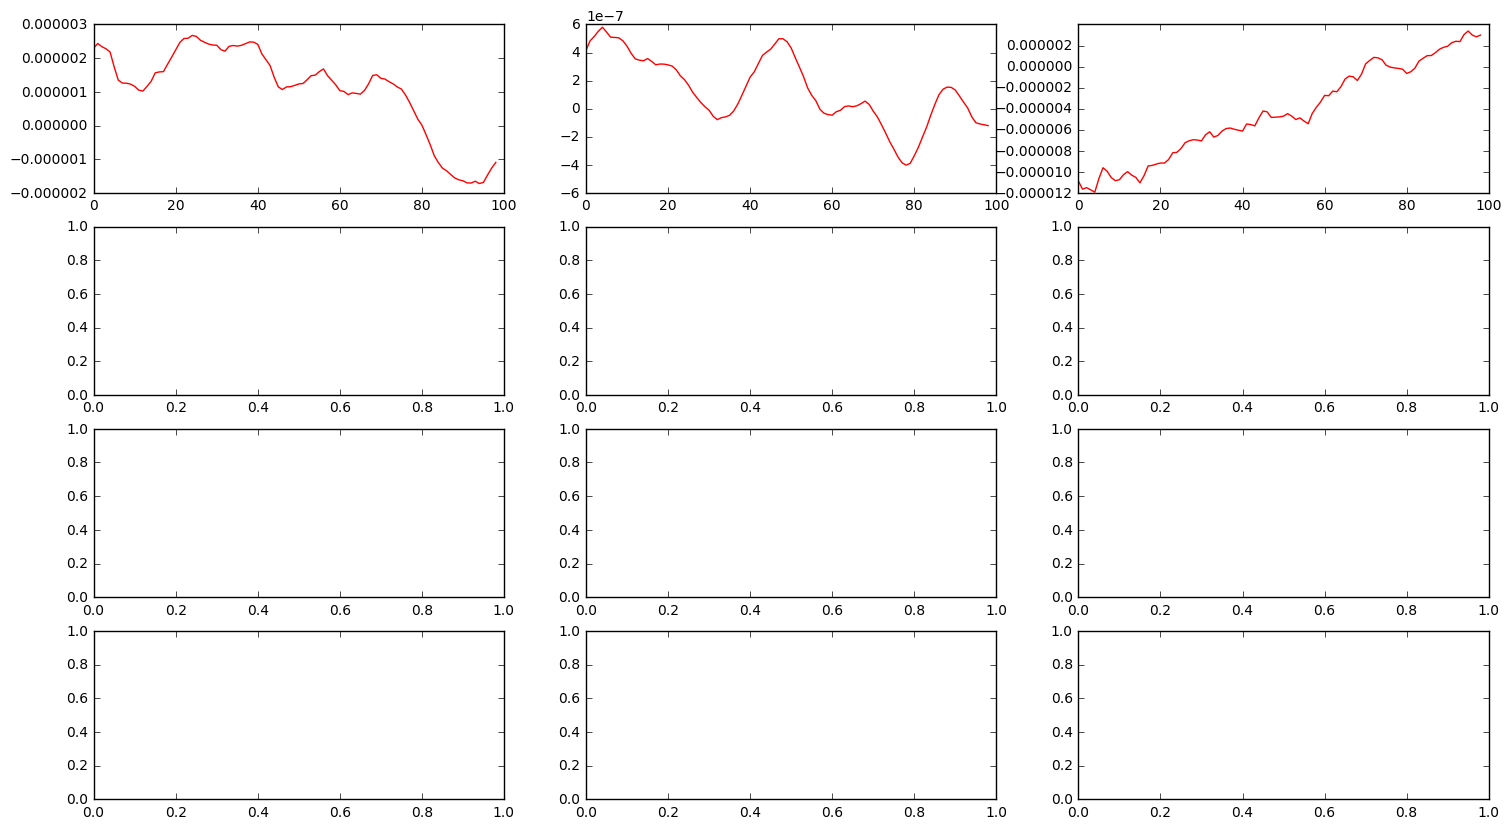

In [80]:
P=3
fig,axes = plt.subplots(nrows=4,ncols=3,figsize=(18,10))
for s in [0,1,2,3,4]:
    for p in range(P):
        axes[s,p].plot(uExpBar[s,p*N:p*N+N-1].T,c='r')

In [51]:
uHatMeansBar = ( Y_test[15]*myModel.phiHatExpBar )* myModel.KpNn*myModel.KpnnInv*myModel.uHatVsBar
#Update for u 
M = np.matrix(myModel.KpnnInv * myModel.KpNn.T)
uExpBar = uHatMeansBar * M
uVBar = myModel.KpNN - myModel.KpNn*myModel.KpnnInv*myModel.KpNn.T + M.T*myModel.uHatVsBar*M
ltest[t] = np.dot(utestExpBar[t,:] ,WHatExp.T) + BHatExp[0,0]

In [55]:
uExpBar.shape

(1, 300)

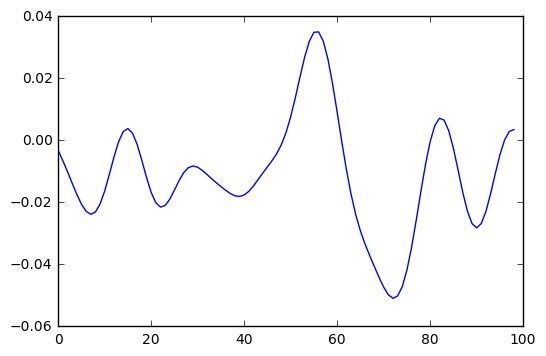

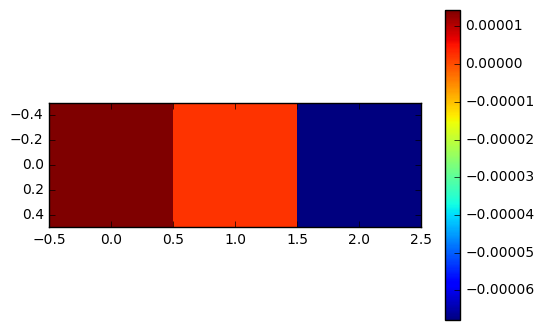

In [64]:
plt.imshow(myModel.phiHatExp, interpolation='none')
plt.colorbar()